In [1]:
# Importing Modules

from qiskit import *
from qiskit.visualization import array_to_latex

import numpy as np

In [2]:
# Defining all Binary Functions

def decimal_to_binary(decimal_number):
    return ("{0:b}".format(int(decimal_number)))

def deimal_list_to_binary_list(decimal_list):
    binary_list = []
    for decimal_number in decimal_list:
        binary_list.append(decimal_to_binary(decimal_number))
    return binary_list

def binary_number_padding(binary_list):
    new_binary_list = []
    
    max_length = len(binary_list[0])
    
    for binary_character in binary_list:
        if len(binary_character) > max_length:
            max_length = len(binary_character)
    
    for i in range(len(binary_list)):
        binary_list[i] = '0'*(max_length-len(binary_list[i]))+binary_list[i]
        
    return binary_list

def return_non_repeat_indices(binary_list):
    length = len(binary_list[0])
    non_repeats = []
    index_list = []
    
    for binary_number in binary_list:
        for i in range(length):
            if i == 0:
                if binary_number[0] == binary_number[1]:
                    #print(f'Repetitions in: {binary_number}, 0 and 1')
                    break
            if i == (length - 1):
                if binary_number[i] == binary_number[i-1]:
                    #print(f'Repetitions in: {binary_number}, {i} and {i-1}')
                    break
            if i != 0 and i != (length - 1):
                if binary_number[i] == binary_number[i-1] or binary_number[i] == binary_number[i+1]:
                    #print(f'Repetitions in: {binary_number}, either {i-1} and {i} or {i} and {i+1}')
                    break
        else:
            #print(binary_number)
            non_repeats.append(binary_number)
            
    for bin_num1 in binary_list:
        for bin_num2 in non_repeats:
            if bin_num1 == bin_num2:
                index_list.append(binary_list.index(bin_num1))
    
    return index_list

In [3]:
# Finction to make the quantum circuit

def answers(indeces):

    qc = QuantumCircuit(2,2)
    indeces = ['10', '11']

    # if indices are 0 and 1
    if indeces[0] == '00' and indeces[1] == '01':
        qc.h(0)

    # if indices are 0 and 2
    if indeces[0] == '00' and indeces[1] == '10':
        qc.h(1)

    # if indices are 0 and 3
    if indeces[0] == '00' and indeces[1] == '11':
        qc.h(0)
        qc.cx(0,1)

    # if indeces are 1 and 2
    if indeces[0] == '01' and indeces[1] == '10':
        qc.h(0)
        qc.cx(0,1)
        qc.x(0)

    # if indices are 1 and 3
    if indeces[0] == '01' and indeces[1] == '11':
        qc.h(1)
        qc.x(0)

    # if indices are 2 and 3
    if indeces[0] == '10' and indeces[1] == '11':
        qc.h(0)
        qc.x(1)

    simulator = Aer.get_backend('aer_simulator')
    circ = transpile(qc, simulator)
    circ.save_statevector(label=f'psi')
    result = simulator.run(circ).result()
    data = result.data(0)['psi']
    
    return {'circuit': qc, 'state': data}

In [4]:
# Putting it all together
'''
takes as input a list of decimal numbers aand draws the required circuit along with printing the indeces of the non
repeating numbers and also saves the state of the circuit
'''

def final_function(decimal_list):
    binary_list = binary_number_padding(deimal_list_to_binary_list(decimal_list))
    indeces = return_non_repeat_indices(binary_list)
    print(f'Non repeating indeces: {indeces}')
    
    global ans
    ans = answers(indeces)
    qc = ans['circuit']
    state = ans['state']
    
    display(array_to_latex(state, prefix="\\ state = "))
    qc.draw('mpl')

Non repeating indeces: [1, 3]


<IPython.core.display.Latex object>

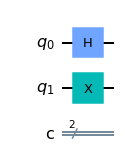

In [5]:
decimal_list = [1,5,4,2] #only thing that needs to be changed by user

final_function(decimal_list)

In [6]:
''' 
to see the quantum circuit, see the dictionary ans
ans['circuit'] is the circuit and ans['state'] is the state
'''

print(ans['state'])
ans['circuit'].draw()

[0.        +0.j 0.        +0.j 0.70710678+0.j 0.70710678+0.j]


┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
c: 2/═════